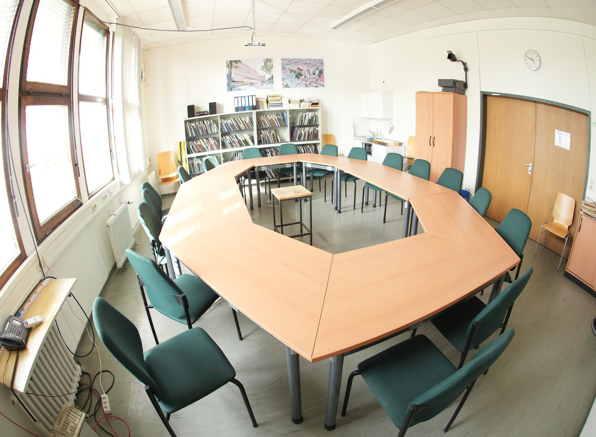

In [1]:
import requests
from PIL import Image

image = Image.open (r"Data/DSC09143.JPG").convert ('RGB')
display (image.resize ((596, 437)))

In [2]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

path = 'BLIP'
processor = AutoProcessor.from_pretrained (path)
model = Blip2ForConditionalGeneration.from_pretrained (path, torch_dtype=torch.float16)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
device = "cuda" if torch.cuda.is_available () else "cpu"
model.to (device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [5]:
prompt = "Question: Please describe all the objects or furniture in the picture, if there are multiple objects, please also describe their position relationship. Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

The table is in the middle of the room,


In [6]:
context = [
   ("Please describe all the objects or furniture in the picture, if there are multiple objects, please also describe their position relationship.", "The table is in the middle of the room"),
]
question = "Based on the answer to?first question, please also give appearance and color?details to the seen objects or furniture"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: Please describe all the objects or furniture in the picture, if there are multiple objects, please also describe their position relationship. Answer: The table is in the middle of the room. Question: Based on the answer to?first question, please also give appearance and color?details to the seen objects or furniture Answer:


In [7]:
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

The table is a rectangular table with a round top


In [8]:
context = [
   ("Please describe all the objects or furniture in the picture, if there are multiple objects, please also describe their position relationship.", "The table is in the middle of the room"),
   ("Based on the answer to?first question, please also give appearance and color?details to the seen objects or furniture", "The table is a retangular table with a round top")
]
question = "Finally based on all the information of the two answers give a summary of the scene including objects and the general decoration style and illuminance"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: Please describe all the objects or furniture in the picture, if there are multiple objects, please also describe their position relationship. Answer: The table is in the middle of the room. Question: Based on the answer to?first question, please also give appearance and color?details to the seen objects or furniture Answer: The table is a retangular table with a round top. Question: Finally based on all the information of the two answers give a summary of the scene including objects and the general decoration style and illuminance Answer:


In [9]:
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

The room is a large room with a large table
